In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/traffic_accidents.csv')
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [11]:
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [14]:
# Convert crash_date to datetime
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

# Extract time features
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour

# Replace UNKNOWN with NaN for easier handling
df.replace("UNKNOWN", pd.NA, inplace=True)

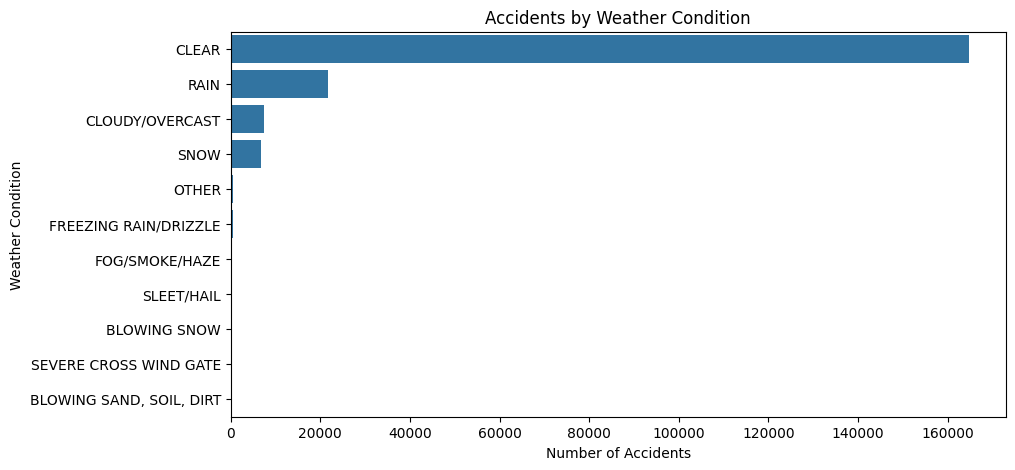

In [15]:
# 1. Accidents by Weather
plt.figure(figsize=(10,5))
sns.countplot(y="weather_condition", data=df, order=df['weather_condition'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

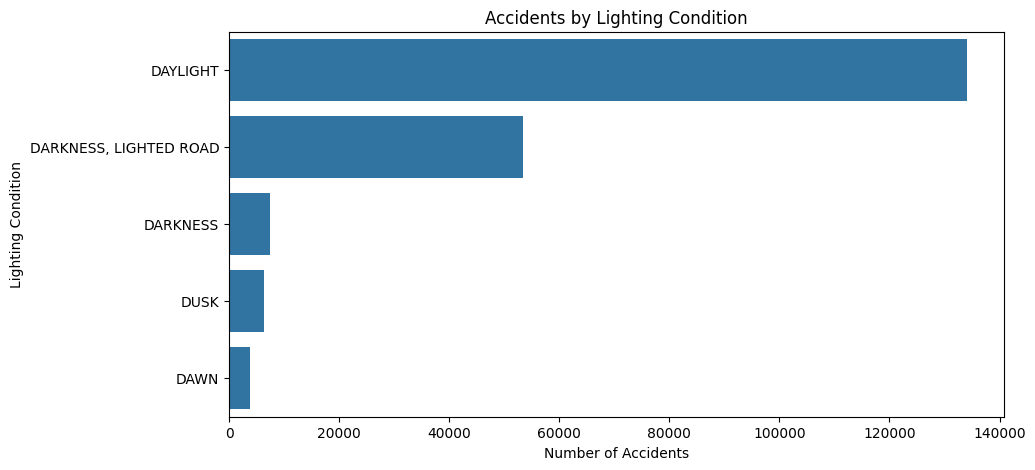

In [16]:
# 2. Accidents by Lighting Condition
plt.figure(figsize=(10,5))
sns.countplot(y="lighting_condition",data=df,order=df['lighting_condition'].value_counts().index)
plt.title("Accidents by Lighting Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Lighting Condition")
plt.show()

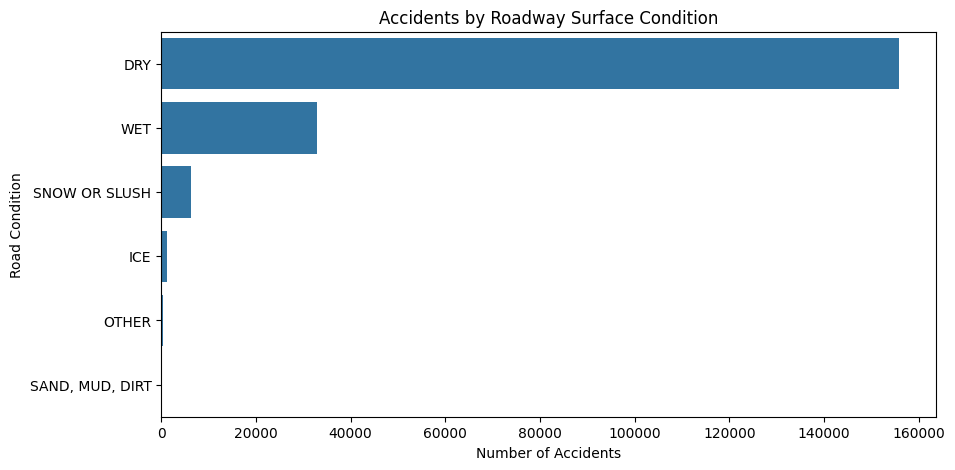

In [17]:
# 3. Accidents by Road Surface Condition
plt.figure(figsize=(10,5))
sns.countplot(y='roadway_surface_cond',data=df,order=df['roadway_surface_cond'].value_counts().index)
plt.title("Accidents by Roadway Surface Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition")
plt.show()

/tmp/ipython-input-2672897092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour',data=df,palette='viridis')


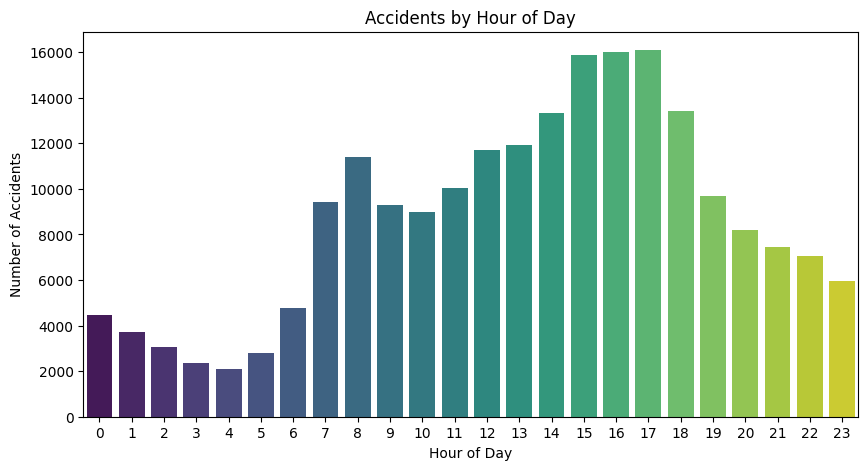

In [22]:
# 4. Accidents by Time of Day (Hour)
plt.figure(figsize=(10,5))
sns.countplot(x='hour',data=df,palette='viridis')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

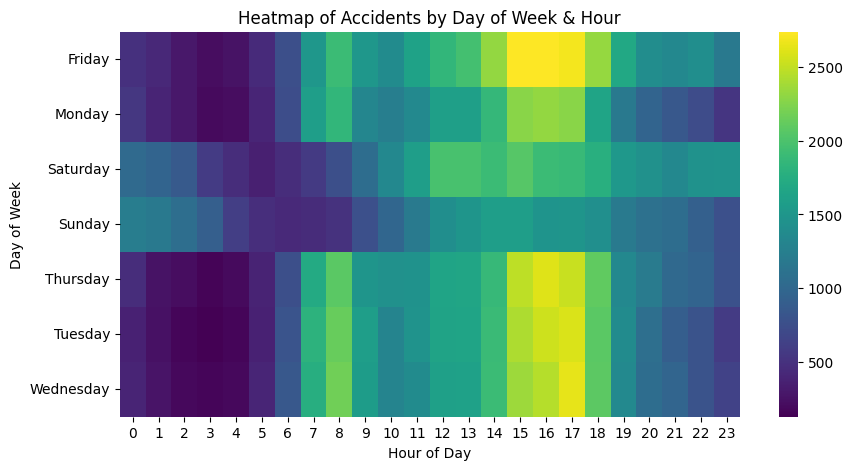

In [20]:
# 5. Heatmap: Accidents by Hour vs Day of Week
pivot_table = df.pivot_table(index='day_of_week',columns='hour',values='crash_type',aggfunc='count')
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table,cmap='viridis')
plt.title("Heatmap of Accidents by Day of Week & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


/tmp/ipython-input-3543274182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_causes.index, x=top_causes.values, palette="mako")


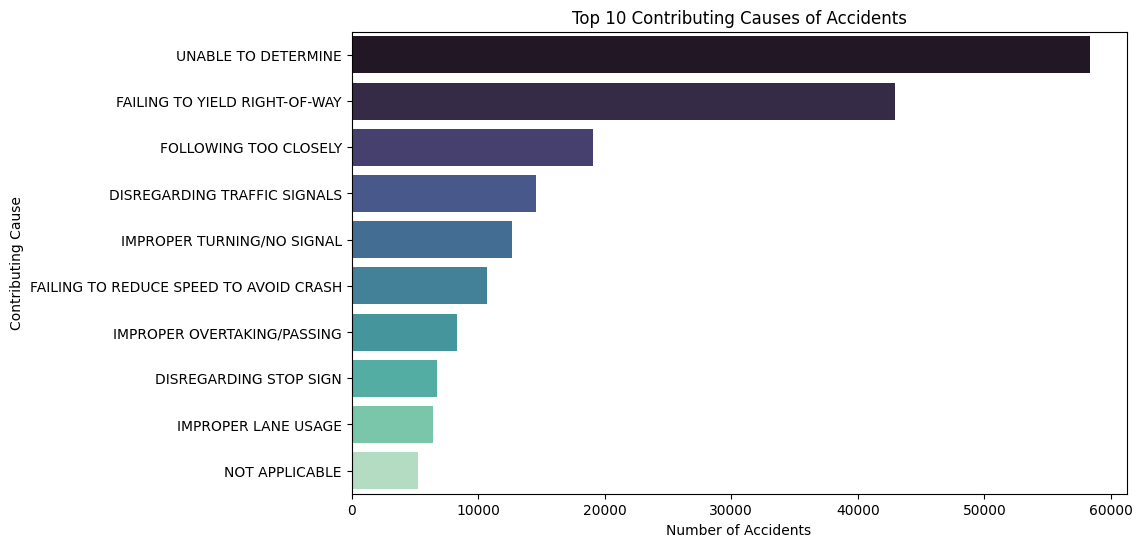

In [28]:
# 6. Primary Contributing Factors
plt.figure(figsize=(10,6))
top_causes = df['prim_contributory_cause'].value_counts().head(10)
sns.barplot(y=top_causes.index, x=top_causes.values, palette="mako")
plt.title("Top 10 Contributing Causes of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Contributing Cause")
plt.show()

In [23]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'year', 'month', 'day_of_week',
       'hour'],
      dtype='object')

In [25]:
df['prim_contributory_cause']

,prim_contributory_cause
0,UNABLE TO DETERMINE
1,IMPROPER TURNING/NO SIGNAL
2,FOLLOWING TOO CLOSELY
3,UNABLE TO DETERMINE
4,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
...,...
209301,UNABLE TO DETERMINE
209302,IMPROPER OVERTAKING/PASSING
209303,RELATED TO BUS STOP
209304,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,..."
